# COMP2420/6420 - Introduction to Data Management, Analysis and Security


### Australian National University

### College of Engineering and Computer Science

Assignment 3 
============

  
|**Maximum marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the total marks for the course**
|  **Submission deadline** |  **5pm, Friday, May 18**
|  **Submission mode**     |  **Electronic, using wattle**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


# Submission

You need to submit the notebook `Assignment-3.ipynb` as part of your submission on wattle. You need to add your group and student details below. Remember your filename should be exactly as given below. Any changes to file name will mean your file can't be marked by the automarker, resulting in a zero mark.

**Note**

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* After inserting your code **please remove** the following line from each code cell `raise NotImplementedError()`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code you will get zero marks. 
* We have marked some questions with a tag **hard** and **slightly hard**, so that you can plan your time accordingly
* We advise students to skip Q2.4 at first. You can always come back after finishing all other questions.
* Have marked changes in color  <font color='magenta'>magenta from last version</font>, there are few clarifications.

### Group Name : 218
### Student Id1: u6028474
### Student Id2: u6161780

In [1]:
import json
import os
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from scipy.stats import ttest_ind, ttest_rel,ttest_1samp
from sklearn.preprocessing import scale
plt.style.use('seaborn-notebook')
## inline figures
%matplotlib inline

## just to make sure few warnings are not shown
import warnings
warnings.filterwarnings("ignore")

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


#### If you need to put more imports please insert them below

In [2]:
## Put extra imports here if required by your code
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
from scipy.stats import iqr
from scipy.spatial import distance_matrix

## Part 1 Data Analysis (15 marks)

We will use the tweets dataset from [Assignment 2](https://cs.anu.edu.au/courses/comp2420/assessment/02-assignments/ass2/comp2420/assignment-2/). The questions in part 1 are not merely about performing a t-test, you need to think carefully about the type of t-test to run and craft your hypothesis accordingly.

#### Reading the dataframe

In [3]:
df_tweets = pd.read_hdf(os.path.join('data','yt_tweets_df.h5'))
df_tweets.head(5)

,time_created,twid,user_id,rtwid,#followers,#friends,#mentions,#hashtags,lang_tweet,lang_user,place
0,2014-08-01 14:54:13,495220965932949505,888538849,495220965932949505,199,156,1,0,th,en,NaN
1,2014-08-01 15:03:33,495223314806108162,143051249,495223314806108162,88,385,1,0,th,en,NaN
2,2014-08-01 15:06:18,495224004316114944,103258302,495224004316114944,312,457,0,1,th,en,NaN
3,2014-08-01 15:11:52,495225405779881984,903364921,495224004316114944,71,461,1,1,th,en,NaN
4,2014-08-01 15:12:19,495225522066968576,555683225,495225522066968576,1533,375,1,0,th,th,NaN


#### For question Q1.1, Q1.2 and Q1.3 you need to work on the dataframe `df_tweets`

## Q 1.1
### Compare the mean for '#friends' for tweets in language 'en' (lang_tweet='en') against the overall mean value, 612. (5 marks)
Give your analysis with the help of a t-test . You will need to explicitly state your hypothesis and p-value being used. In two cells below, write your code to perform test in first cell and in second cell write your hypothesis, p-value and the result from running the tests.

In [4]:
# YOUR CODE HERE
english_tweets = df_tweets[df_tweets.loc[:,'lang_tweet'] == 'en']
print(ttest_1samp(english_tweets['#friends'], df_tweets['#friends'].mean()))
# raise NotImplementedError()

Ttest_1sampResult(statistic=2.492109857809847, pvalue=0.012724705375945883)


The results indicate that we need to reject the null hypothesis as the p-value of 0.0127 is much lower than 5%. The  statistics is -1.922. This means that our data is valid.

## Q 1.2
### Compare the mean for '#friends' for tweets tagged with language English (lang_tweet='en') against the tweets tagged with language Japanese (lang_tweet='ja'). (5 marks)
Give your analysis with the help of a t-test . You will need to explicitly state your hypothesis and p-value being used. In two cells below, write your code to perform test in first cell and in second cell write your hypothesis, p-value and the result from running the tests.

In [5]:
# YOUR CODE HERE
english_tweets = df_tweets[df_tweets.loc[:,'lang_tweet'] == 'en']
japanese_tweets = df_tweets[df_tweets.loc[:,'lang_tweet'] == 'ja']
print(ttest_ind(japanese_tweets.loc[:, '#friends'],english_tweets.loc[:, '#friends']))
# raise NotImplementedError()

Ttest_indResult(statistic=-2.8978352577844055, pvalue=0.003765385642525458)


The t-test performed on tweets in japanese and english give us a p-value of 0.00376 and statistics of -2.89784. The low value of p-value is strong evidence that we reject our null hypothesis and thus they are different from each other.

## Q 1.3
### Compare the mean for '#followers' against '#friends 'for tweets tagged with language English (lang_tweet='en'). (5 marks)

Give your analysis with the help of a t-test . You will need to explicitly state your hypothesis and p-value being used. In two cells below, write your code to perform test in first cell and in second cell write your hypothesis, p-value and the result from running the tests.

In [6]:
# YOUR CODE HERE
followers = english_tweets.loc[:, '#followers']
friends = english_tweets.loc[:, '#friends']
print(ttest_rel(followers,friends))
# raise NotImplementedError()

Ttest_relResult(statistic=6.644535539911943, pvalue=3.301997736107237e-11)


The very low p-value is a strong basis to reject our null hypothesis. Relative t-test is done since #follower and #friends are different population datasets. The statistics measure is 7.4832 and the p-value is 3.302e-11. There is a very low chance that data is similar.

## Part 2 Regression (45 marks)

We will use the data from before 2018 in the [Sean Lahman's Baseball Database](http://www.seanlahman.com/#sportsdata) to create a metric for picking baseball players using linear regression. This database contains the "complete batting and pitching statistics from 1871 to 2017, plus fielding statistics, standings, team stats, managerial records, post-season data, and more". [Documentation provided here]http://www.seanlahman.com/files/database/readme2017.txt).

We have extracted the data and derived two dataframes from it. These dataframes have historical offensive (that is, batting statistics) information about various teams and players up to and including the 2017 season.

Name of pandas DataFrame  | Name of file
:---: |  :---: |
stats |  baseball_team_stats_offensive_players.h5
playerLS | baseball_players_offensive_stats.h5

Description of **stats** DataFrame

Field| Description
:---: |  :---: |
teamID| unique ID for a baseball team
yearID| years for which we have stats for
w| number of games won out of 162 games played in a season
1B| normalized number of singles hit by team
2B| normalized number of doubles hit by team
3B| normalized number of triples hit by team
HR| normalized number of home runs hit by team
BB| normalized number of Base on Balls by team

Description of **playerLS** DataFrame

Field| Description
:---: |  :---: |
playerID| unique ID for a player
POS| position where a player plays in the team
minYear| year the player started his career
maxYear| year the player played his last game
1B| normalized number of singles hit by player
2B| normalized number of doubles hit by player
3B| normalized number of triples hit by player
HR| normalized number of home runs hit by player
BB| normalized number of Base on Balls by player
nameFirst| first name of the player
nameLast| last name of the player
salary| median salary of the player

***Note:*** You don't need to understand exactly what each of features mean! They can be seen as team/individual statistics for a baseball game.

In [7]:
stats = pd.read_hdf(os.path.join('data','baseball_team_stats_offensive_players.h5'))
stats.head(5)

,teamID,yearID,W,1B,2B,3B,HR,BB
1366,KC1,1961,61,0.008502,0.000137,0.002113,-0.007983,-0.007465
1367,LAA,1961,70,-0.008502,-0.000137,-0.002113,0.007983,0.007465
1377,BAL,1962,77,-0.007816,0.001604,-0.001117,0.002158,-0.002690
1379,CHA,1962,85,0.000165,0.004904,0.002352,-0.008813,0.012486
1380,CHN,1962,59,0.003298,-0.003391,0.002497,-0.002944,-0.005119


In [8]:
playerLS = pd.read_hdf(os.path.join('data','baseball_players_offensive_stats.h5'))
playerLS.head(5)

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,nameFirst,nameLast,salary
0,abreubo01,OF,1996,2014,-0.008202,0.006421,0.001002,-0.003252,0.050501,Bobby,Abreu,9000000.0
1,abreujo02,1B,2014,2017,0.010626,0.006734,-0.000287,0.015192,-0.020172,Jose,Abreu,8666000.0
2,ackledu01,2B,2011,2016,-0.015252,-0.007341,0.000254,-0.007980,-0.010525,Dustin,Ackley,2600000.0
3,adamsma01,1B,2012,2017,0.009914,0.012844,0.004034,0.000221,-0.035555,Matt,Adams,525000.0
4,adamsru01,SS,2004,2009,-0.007867,-0.001289,0.004160,-0.017533,0.002672,Russ,Adams,329500.0


## Q 2.1

### Build a simple linear regression model to predict the number of wins for each entry in `stats` dataframe. Your features should be made up of the columns pertaining to normalized singles, double, triples, HR, and BB rates. (10 marks)

To decide which of these terms to include, fit your model on data up to year 2002 and select the best performing model for data from 2003 to 2017. Use the fitted model to define a new [sabermetric](https://en.wikipedia.org/wiki/Sabermetrics) summary: which we'll call Offensive Predicted Wins (OPW). Also list the coefficients of your model

In [9]:
# YOUR CODE HERE
data = stats[(stats.yearID<=2002)]
# columns = data.columns == ['1B','2B','3B','HR','BB']
X_train = data[['1B','2B','3B','HR','BB']]
Y_train = data.W
data = stats[(stats.yearID>2002)]
X_test = data[['1B','2B','3B','HR','BB']]
Y_test = data.W
performance = []
## for running linear regressions for the all required columns 
for i in range(1, len(X_train.columns) + 1):
    X = X_train.iloc[:,:i]
    lm = LinearRegression()
    lm.fit(X,Y_train)
    score = lm.score(X, Y_train)
    performance.append(score)
best = np.argmax(performance)
X = X_train.iloc[:,:best+1]
lm = LinearRegression()
lm.fit(X,Y_train)
## for finding out the coefficients 
print("The coefficients are: ", lm.coef_)

The coefficients are:  [ 538.46353806  507.37735132 1092.7889721   853.74427388  513.99657965]


#### Write your coeficients here in the following order 1B,2B,3B,HR,BB
1B	538.463538
2B	507.377351
3B	1092.788972
HR	853.744274
BB	513.996580

## Q 2.2

### Compute the OPW for each player based on the average rates in the `playerLS` DataFrame (5 marks)

Notice that players essentially have the same features as teams, so you can use your model from Q2.1 to perform a prediction. Add this column to the playerLS DataFrame. Call\Name this colum OPW.

In [10]:
# YOUR CODE HERE
playerLS['OPW']= lm.predict(playerLS[['1B','2B','3B','HR','BB']])

## Q 2.3
### Plot and describe the relationship between the median salary (in millions) and the predicted number of wins for a player. (10 marks)
Player should be active in the seasons between 2010 and 2012 inclusive, and should have an experience of at least 5 years. 

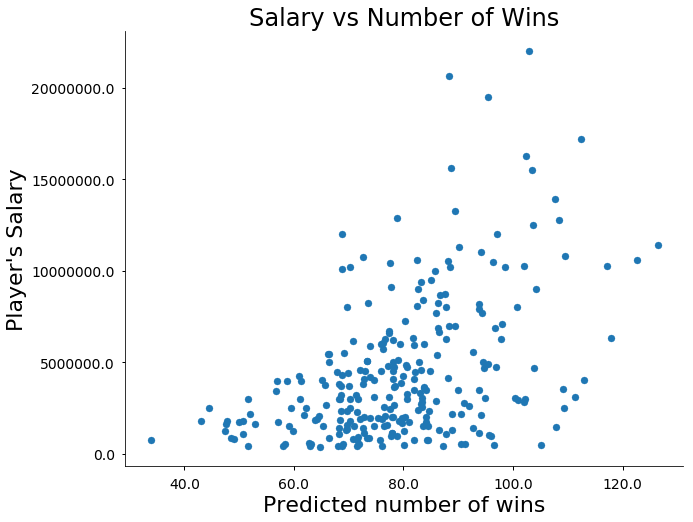

In [11]:
# YOUR CODE HERE
players = playerLS[(playerLS.minYear<=2010) & (playerLS.maxYear>=2012) & ((playerLS.maxYear-playerLS.minYear)>=5)]
players.head(10)
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(players.OPW, players.salary)
ax.set_xlabel("Predicted number of wins", fontsize=22)
ax.set_ylabel("Player's Salary",fontsize=22)
ax.set_title("Salary vs Number of Wins",fontsize=24)
ax.set_xticklabels(ax.get_xticks(),fontsize=14)
ax.set_yticklabels(ax.get_yticks(),fontsize=14)
sns.despine()
# raise NotImplementedError()

####  Write your description here
Lower OPW means lower salary

## Q 2.4 
#### <font color='magenta'> Pick a team of 9 players such that you have a player for each of the 5 positions: C, 1B, 2B, 3B and SS, and 4 players from position OF</font>. The total budget you have for team salary is 25 million dollars.  Try to optimize for the expected/average OPW. (20 marks)  <font color='red'>hard</font>

There are many ways to do this, any reasonable optimization will be worth marks, along with the explanation of why and what are you doing. You should write your explanation in the text block provided

In [12]:
# YOUR CODE HERE
# Dividing the players into separate categories with descending orders of their OPW
position_c = playerLS[(playerLS.POS == 'C')].sort_values('OPW', ascending=False)
position_1b = playerLS[(playerLS.POS == '1B')].sort_values('OPW', ascending=False)
position_2b = playerLS[(playerLS.POS == '2B')].sort_values('OPW', ascending=False)
position_3b = playerLS[(playerLS.POS == '3B')].sort_values('OPW', ascending=False)
position_ss = playerLS[(playerLS.POS == 'SS')].sort_values('OPW', ascending=False)
position_of = playerLS[(playerLS.POS == 'OF')].sort_values('OPW', ascending=False)
# Initializing our variables for the for-loop
salaries = []
team = {}
team['c'] = position_c.iloc[0,0]
salaries.append(position_c.iloc[0,11])
team['1b'] = position_1b.iloc[0,0]
salaries.append(position_1b.iloc[0,11])
team['2b'] = position_2b.iloc[0,0]
salaries.append(position_2b.iloc[0,11])
team['3b'] = position_3b.iloc[0,0]
salaries.append(position_3b.iloc[0,11])
team['ss'] = position_ss.iloc[0,0]
salaries.append(position_ss.iloc[0,11])
team['of0'] = position_of.iloc[0,0]
salaries.append(position_of.iloc[0,11])
team['of1'] = position_of.iloc[1,0]
salaries.append(position_of.iloc[1,11])
team['of2'] = position_of.iloc[2,0]
salaries.append(position_of.iloc[2,11])
team['of3'] = position_of.iloc[3,0]
salaries.append(position_of.iloc[3,11])
indexes = np.ones(6)
indexes[5] = 4
# Run the for-loop and keep replacing most expensive players until total salaries drop
# below $25 million
while(np.sum(salaries) > 25000000):
    takeout = np.argmax(salaries)
    if takeout <= 4: 
        i = int (indexes[takeout])
    else:
        i = int (indexes[5])
    if (takeout == 0):
        team['c'] = position_c.iloc[i,0]
        salaries[takeout] =  position_c.iloc[i,11]
        indexes[takeout] += 1
    elif (takeout == 1):
        team['1b'] = position_1b.iloc[i,0]
        salaries[takeout] =  position_1b.iloc[i,11]
        indexes[takeout] += 1
    elif (takeout == 2):
        team['2b'] = position_2b.iloc[i,0]
        salaries[takeout] =  position_2b.iloc[i,11]
        indexes[takeout] += 1
    elif (takeout == 3):
        team['3b'] = position_3b.iloc[i,0]
        salaries[takeout] =  position_3b.iloc[i,11]
        indexes[takeout] += 1
    elif (takeout == 4):
        team['ss'] = position_ss.iloc[i,0]
        salaries[takeout] =  position_ss.iloc[i,11]
        indexes[takeout] += 1
    elif (takeout == 5):
        team['of0'] = position_of.iloc[i,0]
        salaries[takeout] =  position_of.iloc[i,11]
        indexes[5] += 1
    elif (takeout == 6):
        team['of1'] = position_of.iloc[i,0]
        salaries[takeout] =  position_of.iloc[i,11]
        indexes[5] += 1
    elif (takeout == 7):
        team['of2'] = position_of.iloc[i,0]
        salaries[takeout] =  position_of.iloc[i,11]
        indexes[5] += 1
    elif (takeout == 8):
        team['of3'] = position_of.iloc[i,0]
        salaries[takeout] =  position_of.iloc[i,11]
        indexes[5] += 1
teamFormed = playerLS[(playerLS.playerID.isin(list(team.values())))]
print("Sum of OPW of team players is: ", np.sum(teamFormed.OPW))
teamFormed

Sum of OPW of team players is:  1026.2817340399786


,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,nameFirst,nameLast,salary,OPW
26,avilaal01,C,2009,2017,-0.010850,0.011795,0.002084,0.002600,0.046071,Alex,Avila,2500000.0,109.392346
82,blausje01,SS,1987,1999,0.020951,-0.000902,-0.000679,-0.004460,0.024519,Jeff,Blauser,2000000.0,99.950053
86,boggswa01,3B,1982,1999,0.040157,0.010644,-0.000072,-0.017124,0.042876,Wade,Boggs,1900000.0,115.436715
157,carewro01,2B,1967,1985,0.057949,0.001120,0.005040,-0.015115,0.008045,Rod,Carew,875000.0,109.584180
282,dykstle01,OF,1985,1996,0.014736,0.008640,0.000242,-0.006930,0.053991,Lenny,Dykstra,2316667.0,115.490040
427,harpebr03,OF,2012,2017,-0.026032,-0.001750,0.001628,0.013729,0.067651,Bryce,Harper,2325000.0,114.440366
766,phamth01,OF,2014,2017,0.018147,-0.006995,-0.000564,0.006524,0.045787,Tommy,Pham,510000.0,115.784113
949,thomafr04,1B,1990,2008,-0.020341,0.001086,-0.004899,0.021387,0.069537,Frank,Thomas,7000000.0,119.318192
965,troutmi01,OF,2011,2017,-0.007585,0.001315,0.006080,0.017489,0.053802,Mike,Trout,3541500.0,126.885728


#### Your explanation here
The players are divided into groups by their position in descending order of their OPW. After this we initialized the team with the top players in each positions. Obviously, in the beginning we are going to get the most expensive players and the sum of their salaries will be greater than 25 million. Then we start by finding the most expensive player in the team and replacing him with the next best who 'might be' cheaper than the first for that position. This is repeated until the sum of salaries fall below $25 million and then we get the best team of players. 

## Part 3 Classification (20 marks)

In this example we will use the [ credit card clients ](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) dataset.

This dataset has 24 coulmns. The last column named `DEFAULT` is the target variable which takes binary value, 1 or 0, indicating whether the client will default or not next month. Your task is **create a KNN classifier** for this dataset in Q3. You don't need to write the code to download and read the dataset as we have done this for you. You will need to work on the dataframe 'df_credit'.

Description of **df_credit** dataframe

Field| Description (type of values it takes)
:---: |  :---: |
LIMIT_BAL| Amount of the given credit
SEX| Gender (1 = male; 2 = female). 
EDUCATION|  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
MARRIAGE|  Marital status (1 = married; 2 = single; 3 = others)
AGE| Age (year)
PAY_0| History of past payment, last month ( -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)
PAY_2| History of past payment, 2 month back (same as PAY_0)
PAY_3| History of past payment, 3 month back (same as PAY_0)
PAY_4| History of past payment, 4 month back (same as PAY_0)
PAY_5| History of past payment, 5 month back (same as PAY_0)
PAY_6| History of past payment, 6 month back (same as PAY_0)
BILL_AMT1|  Amount of bill statement, last month
BILL_AMT2|  Amount of bill statement, 2 month back
BILL_AMT3|  Amount of bill statement, 3 month back
BILL_AMT4|  Amount of bill statement, 4 month back
BILL_AMT5|  Amount of bill statement, 5 month back
BILL_AMT6|  Amount of bill statement, 6 month back
PAY_AMT1|  Amount of previous payment, last month
PAY_AMT2|  Amount of previous payment, 2 month back
PAY_AMT3|  Amount of previous payment, 3 month back
PAY_AMT4|  Amount of previous payment, 4 month back
PAY_AMT5|  Amount of previous payment, 5 month back
PAY_AMT6|  Amount of previous payment, 6 month back
DEFAULT|  Will deafult this time (Yes = 1, No = 0)


##### You will need to create a training and test set yourself. Refer to the [lab 6](https://cs.anu.edu.au/courses/comp2420/labs/lab-6/) exercise

In [13]:
df_credit = pd.read_hdf(os.path.join('data','df_credit.h5'))
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Q 3.1
#### Write a **ten-fold cross validation** to estimate the optimal value for $k$ for the data set. <font color='magenta'>You need to consider only values between 20 to 50(inclusive) for $k$.</font>(10 marks) 

##### You will need to create a training and test set yourself. Refer to the [lab 6](https://cs.anu.edu.au/courses/comp2420/labs/lab-6/) exercise

***Note*** Keep in mind optimal value of $k$ depends on $d$, where $d$ is the number of features used.

Best value for K is  25


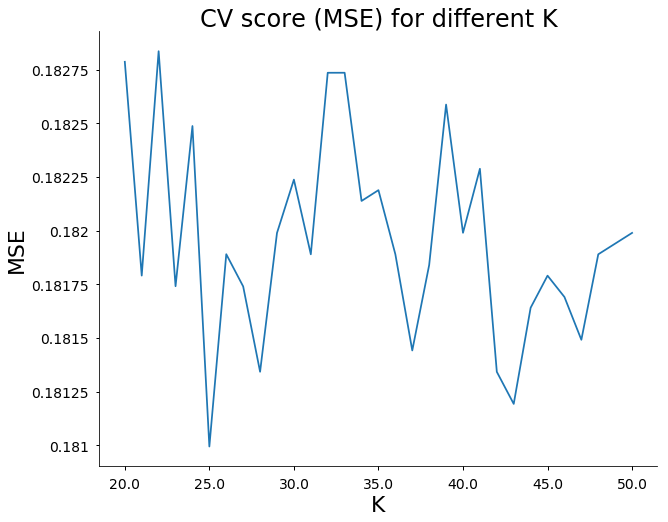

In [14]:
# YOUR CODE HERE
X = df_credit[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
Y = df_credit.DEFAULT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
performance = []
k_set = [i for i in range(20,50+1)]
for k in k_set:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_model, X_train, Y_train, cv=10, scoring=make_scorer(mean_squared_error))
    performance.append(np.mean(score))
    
# plotting these scores
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.plot(k_set, performance)
ax.set_xlabel("K", fontsize=22)
ax.set_ylabel("MSE",fontsize=22)
ax.set_title("CV score (MSE) for different K",fontsize=24)
ax.set_xticklabels(ax.get_xticks(),fontsize=14)
ax.set_yticklabels(ax.get_yticks(),fontsize=14)
sns.despine()

print("Best value for K is ",k_set[np.argmin(performance)])
# raise NotImplementedError()

## Q 3.2 
#### Create a boxplot showing training scores for the optimal $k$ for each $d$-dimensional subspace with $d$ ranging from one to 23. <font color='magenta'>You need to consider only values between 20 to 50 (inclusive) for $k$.</font> (5 marks)
The plot should have the scores on the y-axis and the different dimensions $d$ on the x-axis. You should increase the features incrementally -- this exercise needs you to start from one feature and increase the number of features to 23 incrementally.

In [15]:
df_credit.iloc[:,23].head(1)

ID
1    1
Name: DEFAULT, dtype: int64

In [16]:
X_train.iloc[:,:4].head(2)

,PAY_0,PAY_2,PAY_3,PAY_4
ID,,,,
10503,0,0,0,0
18060,-1,-1,-1,-1


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,


[Text(0,0,'(1, 30)'),
 Text(0,0,'(2, 36)'),
 Text(0,0,'(3, 44)'),
 Text(0,0,'(4, 42)'),
 Text(0,0,'(5, 50)'),
 Text(0,0,'(6, 21)'),
 Text(0,0,'(7, 21)'),
 Text(0,0,'(8, 21)'),
 Text(0,0,'(9, 23)'),
 Text(0,0,'(10, 21)'),
 Text(0,0,'(11, 21)'),
 Text(0,0,'(12, 40)'),
 Text(0,0,'(13, 49)'),
 Text(0,0,'(14, 48)'),
 Text(0,0,'(15, 36)'),
 Text(0,0,'(16, 44)'),
 Text(0,0,'(17, 50)'),
 Text(0,0,'(18, 46)'),
 Text(0,0,'(19, 48)'),
 Text(0,0,'(20, 46)'),
 Text(0,0,'(21, 48)'),
 Text(0,0,'(22, 38)'),
 Text(0,0,'(23, 48)')]

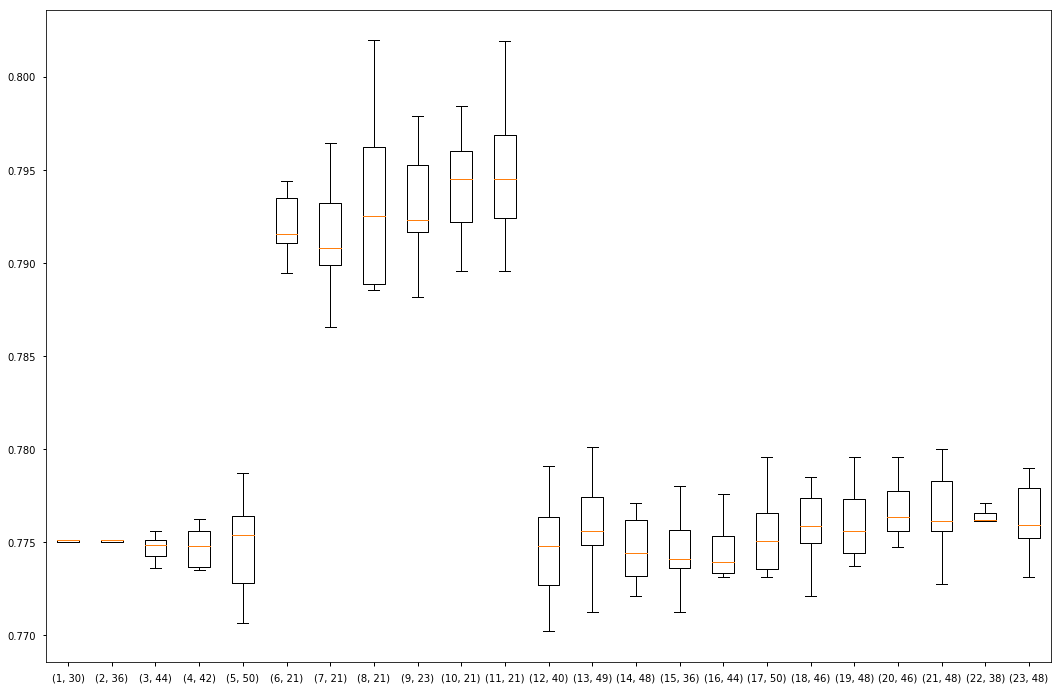

In [17]:
# YOUR CODE HERE

print()
# Create a figure instance
fig = plt.figure(1, figsize=(18, 12))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(optimal)
ax.set_xticklabels(list(pair.values()))
# raise NotImplementedError()

## Q 3.3

#### Evaluate your performance on test set with best ($k$,$d$) pair. (5 marks)

Additionally, write a brief discussion of your conclusions to the questions and tasks in Q3.1 and Q3.2 in 100 words or less each.

In [18]:
# YOUR CODE HERE
k, d = best
Y_train_i = Y_train
X_train_i = X_train[columns[:d]]
Y_test_i = Y_test
X_test_i = X_test[columns[:d]]
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_i, Y_train_i)
score = knn_model.score(X_test_i, Y_test_i)
score1 = np.mean((Y_train_i - knn_model.predict(X_train_i)) ** 2)
score2 = np.mean((Y_test_i - knn_model.predict(X_test_i)) ** 2)
print("Best k and d are: ", k, d)
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train_i - knn_model.predict(X_train_i)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test_i - knn_model.predict(X_test_i)) ** 2))
# raise NotImplementedError()

Best k and d are:  21 11
Fit a model X_train, and calculate MSE with Y_train: 0.19895522388059703
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.19646464646464645


We can see that the Mean-Squared error for both when our knn model predicts the X_train_i values and X_test_i values is very low. It comes out to be 0.198955 for training set and 0.19646 for testing set.
Question 3.2: The value selected in Q3.3 can be verified from the box plot drawn in Q3.2 where the d = 11 dimensions gives the highest score for the training set.
Question 3.1: We can see from the box plot that the highest score is reached when we start including columns 6 to 11 with each column added giving better and better results in general. This shows that PAY_X are the columns that are best at predicting Default values and for this reason these columns have been used in Question 3.1. The figure plotted in this questions shows that the best value of k is 37 which gives an MSE of around 0.17825 which is the lowest we have gotten so far even lower than if you include all columns from starting to the best k, d from 3.2.

## Part 4 K-Means (10 marks)

We will use the standard [breast cancer data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), from sklearn. We have already loaded the datset for you. $X$ contains all the features.

In [19]:
breast_cancer = datasets.load_breast_cancer()
X = scale(breast_cancer.data)

## Q 4.1 
#### Implement K-Means clustering for digits data. (10 marks) <font color='red'>slightly hard</font>

Complete the function kmeans below.
 
***Note:*** 
- You are **not allowed** to use any of the **sklearn's pre-implemented algorithms or functions**. 
- You are **not allowed** to use any pre-implemented **k-means** algorithm from **any module** .
- You **should** use the **numpy** library to do matrix operations and calculations.
- <font color='magenta'> You **should** use some smart ways for initializations.</font>

In [20]:
def kmeans(X, n_cluster, random_seed=2, n_init=100):
    '''
    Function calculates the centroids after performing k-means on the given dataset. 
    Function returns two values new calculated centers and labels for each datapoint.
    If we have n_cluster = 4 then labels from algorithm will correspond to values 0,1,2 and 3
    
    Args:
        X: np.array representing set of input data
        n_cluster: number of clusters to use for clustering
        random_seed: random seed to use for calling random function in numpy
        n_inint: max number of iterations to use for k-means
    Returns:
        centers: np.array representing the centers for n_clusters
        labels: np.array containing a label for each datapoint in X
    '''
    # Removing outliers assuming a normal distribution
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    filtered_X = np.array([x for x in X if all((Q1-1.5*IQR<x) & (x<Q3+1.5*IQR))])
    labels = np.zeros(X.shape[0]) 
    listCenters = []
    minDist = 0
    # After removing outilers, we select the centroids generated randomly
    # that where the minimum distance between them is maximum. This ensures
    # that our outliers cover a good proportion of the data set.
    for i in range(0,10):
        rnd = np.random.RandomState(random_seed+i)
        i = rnd.permutation(filtered_X.shape[0])[:n_cluster]
        initial = filtered_X[i]
        d = distance_matrix(initial, initial)
        np.place(d, d==0, [np.Infinity])
        if (np.min(d) > minDist):
            minDist = np.min(d)
            centers = initial
    for i in range(0,n_init):
        # Reassignment
        distances = np.sqrt(((X - centers[:, np.newaxis])**2).sum(axis=2))
        closest = np.argmin(distances, axis=0)
        labels = closest
        # Recomputation
        centers = np.array([X[closest==k].mean(axis=0) for k in range(centers.shape[0])])

        
    return centers,labels

## change the parameters of the function call to test your implementation
centers, labels = kmeans(X,n_cluster=4, random_seed=4, n_init=300)

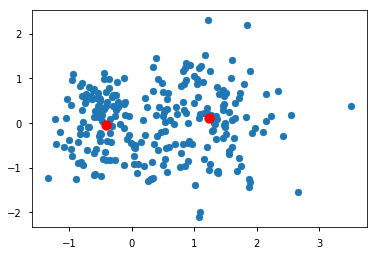

In [21]:
## optional :You can write a code to visualize or check your algorithm here
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])), \
                    (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])), \
                    (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
centroids, labels = kmeans(points, 2, n_init=200)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

## Part 5 Decision Trees (10 marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split on a range of age values.
* Attribute selection in the tree uses information gain 

## Q 5.1
#### What is the initial entropy of Rain?  (2 marks)


The entropy is calculated as -7/12log(7/12)-5/12log(5/12) which is equal to  0.98

## Q 5.2
#### Which attribute would the decision-tree building algorithm choose at the root of the tree?   (2 marks)

Choose one through inspection and explain your reasoning in a sentence. 

Cloudy would be the attribute choosen by decision-tree as it would give the purest splits. For all the 'Yes' values of Cloudy there is always 'yes' in Rain and for 'No' there is either 'Yes' or 'No'

## Q 5.3
#### Calculate and specify the information gain of the attribute you chose to split on in the previous question.  (3 marks)

Information gain is coming out to be : 0.8113 - 0.4046 = 0.4067 which is a good measure and thus cloudy can be used.
H(cloudy|Rain) = -7/12*log2(7/12) - 5/12*log2(5/12) -3/12*log2(3/12)

## Q 5.4

#### Consider a decision tree built from an arbitrary set of data. If the output is binary, what is the maximum training set error for this dataset? Explain your answer. (Please note that this is the error on the same dataset the tree was trained on.  A new test set could have arbitrary errors.) (3 marks) <font color='red'>slightly hard</font>

The maximum error would occur when all the rows selected from the data have equal number of output for each of the binary output whereas only one value of the input attribute. In this case the error would be 0.5 or 50%. For example consider we have the following table

|**Engine Type**         |**Car Type**
|--------------------------|--------
|  I4 |  Hatchback
|  V6 |  Sedan
|  I4 |  Hatchback
|  I4 |  Hatchback
|  V6 |  Sedan
|  I4 |  Sedan
|  I4 |  Sedan
|  I4 |  Sedan

If only the rows that have 'I4' as the engine type are selected than the decision tree would either classify a car as Hatchback or Sedan resulting in a 50% error either way for this training data.